In [2]:
import pathlib
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
# Parameters for the normal distribution
mean = 0     # Mean of the distribution
std_dev = 1  # Standard deviation of the distribution
num_samples = 1000  # Number of data points

# Generate the normally distributed dataset
normal_data = np.round(np.random.normal(loc=mean, scale=std_dev, size=num_samples), 4)
right_skewed = np.round(np.random.lognormal(mean=mean, sigma=std_dev, size=num_samples), 4)
left_skewed = -right_skewed

df = pd.DataFrame({'normal': normal_data, 'right': right_skewed, 'left': left_skewed})
df.sample(3)

,normal,right,left
406,1.7627,1.0744,-1.0744
127,0.7451,1.4823,-1.4823
14,-0.9119,4.9499,-4.9499


<h3 style="color: yellow;"><strong>Z-score - Univariate Technique</strong></h3>
Assumption: The distribution of data should be normal or some sort of normal.

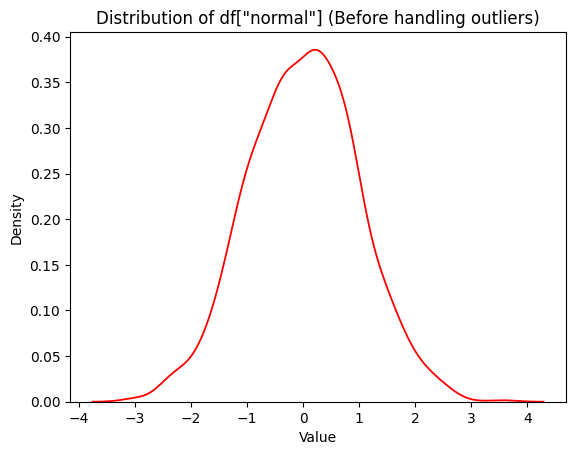

In [39]:
# Plot a histogram of the generated data
sns.kdeplot(df['normal'], color='red', linewidth=1.3)
plt.title('Distribution of df["normal"] (Before handling outliers)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

In [49]:
mean = df['normal'].mean()
std = df['normal'].std()
min = df['normal'].min()
max = df['normal'].max()
ul = mean + 2 * std    # 2.5 std for testing purpose only
ll = mean - 2 * std

print(f'Mean: {mean}')
print(f'Std: {std}')
print(f'Min: {min}')
print(f'Max: {max}')
print(f'Upper Limit: {ul}')
print(f'Lower Limit: {ll}')

Mean: 0.006779500000000001
Std: 0.9778445110535455
Min: -3.0142
Max: 3.5487
Upper Limit: 1.962468522107091
Lower Limit: -1.9489095221070911


<Font color = 'yellow'>

Now we've 2 options:
- Trimming - remove the data
    - Problems:
        - Information lose
- Capping - cap the data at max & min values
    - Problems:
        - Tails of distribution will become fatty (kurtosis)

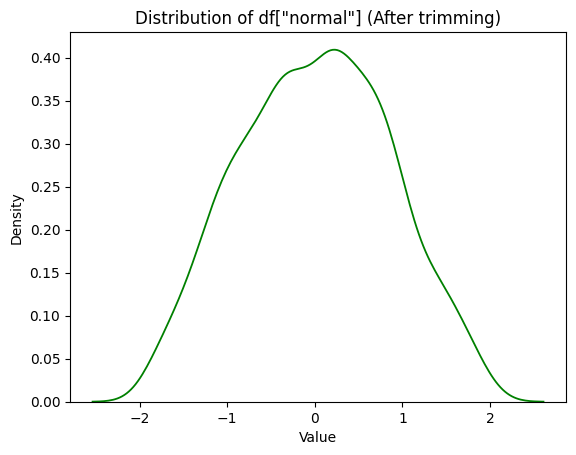

In [50]:
# Trimming
trimmed_df = df[(df['normal'] >= ll) & (df['normal'] <= ul)]

# Plot a histogram of the generated data
sns.kdeplot(trimmed_df['normal'], color='green', linewidth=1.3)
plt.title('Distribution of df["normal"] (After trimming)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

In [247]:
# capping using clip() function
# df['normal'] = df['normal'].clip(lower=ll, upper=ul)

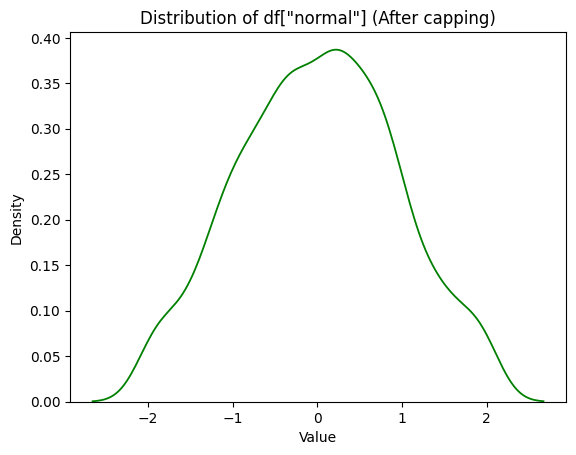

In [51]:
# capping using where() function
# cond - it'll keep only "cond" values remaining will be replaced by "other"

df_capped = df['normal'].where(cond = df['normal']>=ll, other=ll)
df_capped = df_capped.where(cond = df['normal']<=ul, other=ul) 
# Plot a histogram of the generated data
sns.kdeplot(df_capped, color='green', linewidth=1.3)
plt.title('Distribution of df["normal"] (After capping)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

<Figure size 640x480 with 0 Axes>

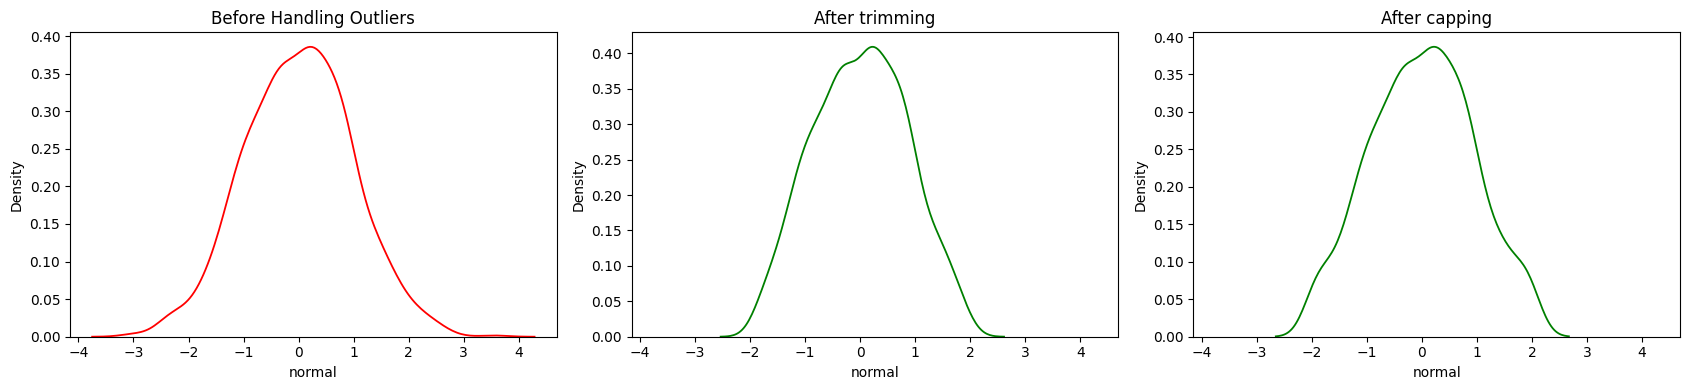

In [52]:
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (17, 4), sharex = True)

sns.kdeplot(df['normal'], color='red', ax=ax[0], linewidth=1.3)
ax[0].set_title('Before Handling Outliers')
sns.kdeplot(trimmed_df['normal'], color='green', ax=ax[1], linewidth=1.3)
ax[1].set_title('After trimming')
sns.kdeplot(df_capped, color='green', ax=ax[2], linewidth=1.3)
ax[2].set_title('After capping')
fig.tight_layout()     # adjust the margins and all
plt.savefig('zscore.png')
plt.show()

___

<font color = 'yellow'>

<h3><strong>IQR Technique - Univariate Technique</strong></h3>

Use when not sure about distribution of data. Same as above either remove the data (trimming) or cap the values.
- upper_limit = Q3 + 1.5 * IQR
- lower_limit = Q1 - 1.5 * IQR

IQR = Q3 - Q1

In [250]:
df.sample(4)

,normal,right,left
416,-0.2350,0.5653,-0.5653
362,-1.0388,6.3676,-6.3676
154,-0.7699,1.8670,-1.8670
450,-0.0925,2.8152,-2.8152


<Font color = 'yellow'>

<h5 style="color: yellow;"><strong>Handling Right Skewed Data using IQR Technique</strong></h5>


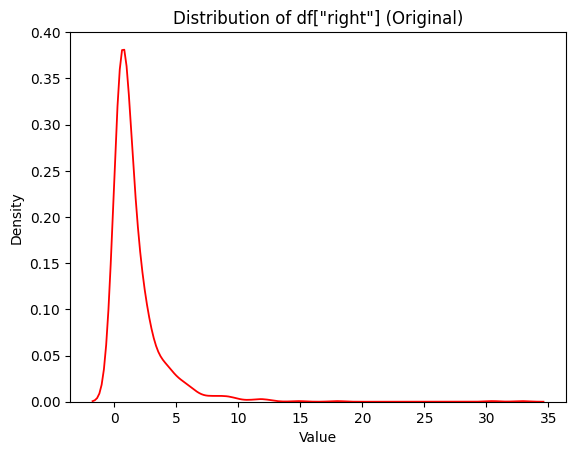

In [251]:
# Plot a histogram of the generated data
sns.kdeplot(df['right'], color='red', linewidth=1.3)
plt.title('Distribution of df["right"] (Original)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

In [252]:
mean = df['right'].mean()
std = df['right'].std()
min = df['right'].min()
max = df['right'].max()
Q1 = df['right'].quantile(0.25)
Q3 = df['right'].quantile(0.75)
IQR = Q3 - Q1
ul = Q3 + 1.5 * IQR
ll = Q1 - 1.5 * IQR

print(f'Mean: {mean}')
print(f'Std: {std}')
print(f'Actual Min: {min}')
print(f'Actual Max: {max}')
print(f'Upper Limit: {ul}')
print(f'Lower Limit: {ll}')

Mean: 1.7262266
Std: 2.3540489493739267
Actual Min: 0.0415
Actual Max: 32.8252
Upper Limit: 4.325699999999999
Lower Limit: -1.7587


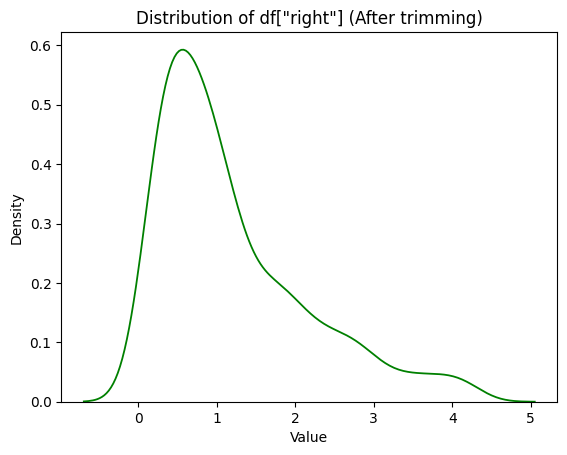

In [256]:
# Trimming
trimmed_df_iqr = df[(df['right'] >= ll) & (df['right'] <= ul)]

# Plot a histogram of the generated data
# sns.kdeplot(df['right'], color='blue', linewidth=1.3)
sns.kdeplot(trimmed_df_iqr['right'], color='green', linewidth=1.3)
plt.title('Distribution of df["right"] (After trimming)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

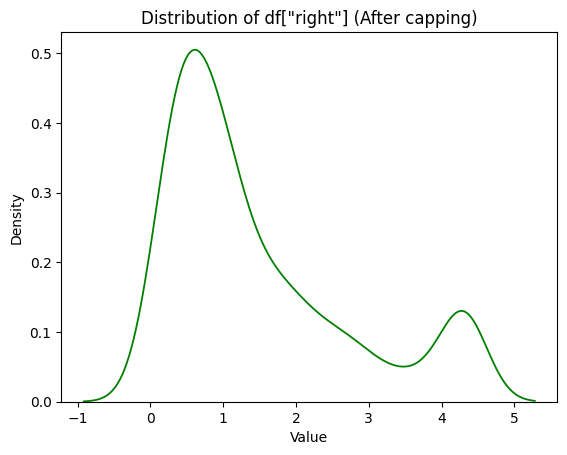

In [254]:
# capping using where() function
# cond - it'll keep only "cond" values remaining will be replaced by "other"

df_capped_iqr = df['right'].where(cond = df['right']>=ll, other=ll)
df_capped_iqr = df_capped_iqr.where(cond = df['right']<=ul, other=ul) 

# Plot a histogram of the generated data
# sns.kdeplot(df['right'], color='red')
sns.kdeplot(df_capped_iqr, color='green', linewidth=1.3)
plt.title('Distribution of df["right"] (After capping)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

<Figure size 640x480 with 0 Axes>

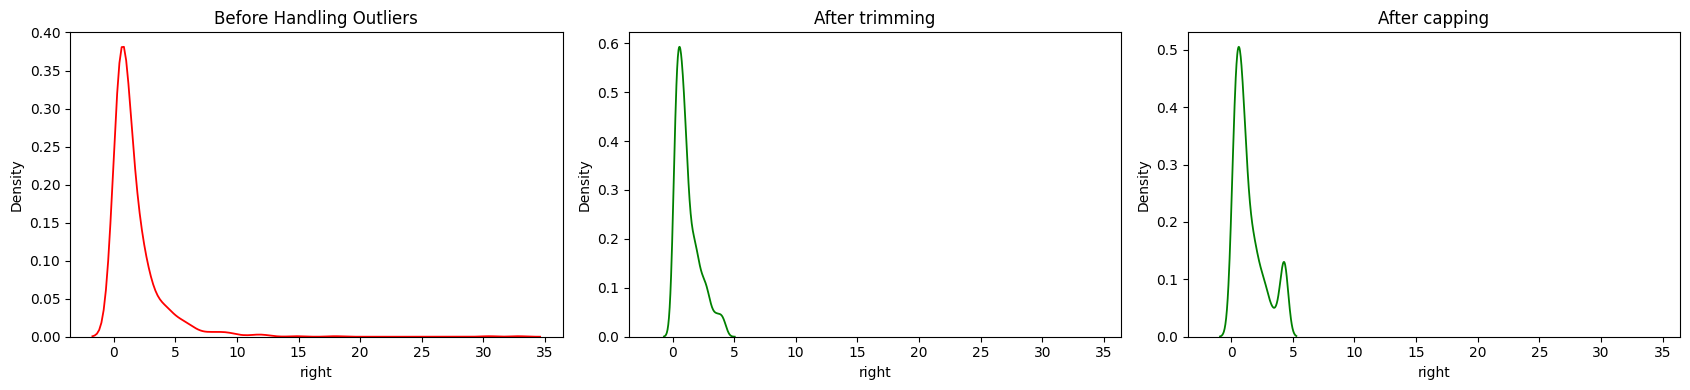

In [255]:
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (17, 4), sharex = True)

sns.kdeplot(df['right'], color='red', ax=ax[0], linewidth=1.3)
ax[0].set_title('Before Handling Outliers')
sns.kdeplot(trimmed_df_iqr['right'], color='green', ax=ax[1], linewidth=1.3)
ax[1].set_title('After trimming')
sns.kdeplot(df_capped_iqr, color='green', ax=ax[2], linewidth=1.3)
ax[2].set_title('After capping')
fig.tight_layout()     # adjust the margins and all
plt.show()

<h5 style="color: yellow;"><strong>Handling Left Skewed Data using IQR Technique</strong></h5>

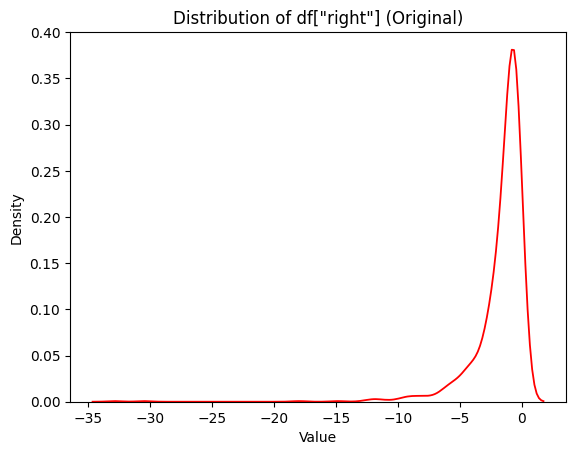

In [258]:
# Plot a histogram of the generated data
sns.kdeplot(df['left'], color='red', linewidth=1.3)
plt.title('Distribution of df["right"] (Original)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

In [259]:
mean = df['left'].mean()
std = df['left'].std()
min = df['left'].min()
max = df['left'].max()
Q1 = df['left'].quantile(0.25)
Q3 = df['left'].quantile(0.75)
IQR = Q3 - Q1
ul = Q3 + 1.5 * IQR
ll = Q1 - 1.5 * IQR

print(f'Mean: {mean}')
print(f'Std: {std}')
print(f'Actual Min: {min}')
print(f'Actual Max: {max}')
print(f'Upper Limit: {ul}')
print(f'Lower Limit: {ll}')

Mean: -1.7262266
Std: 2.3540489493739267
Actual Min: -32.8252
Actual Max: -0.0415
Upper Limit: 1.7587
Lower Limit: -4.325699999999999


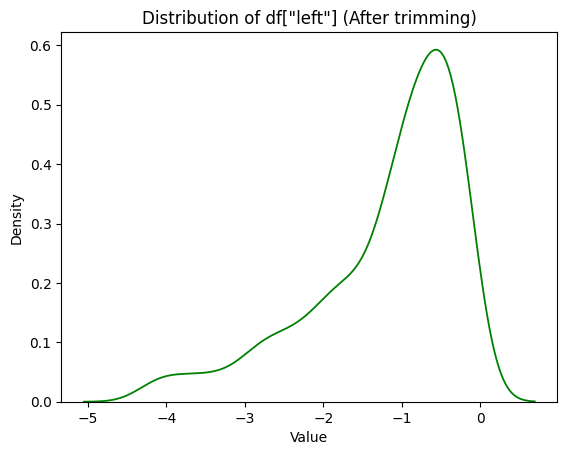

In [260]:
# Trimming
trimmed_df_iqr = df[(df['left'] >= ll) & (df['left'] <= ul)]

# Plot a histogram of the generated data
# sns.kdeplot(df['right'], color='blue', linewidth=1.3)
sns.kdeplot(trimmed_df_iqr['left'], color='green', linewidth=1.3)
plt.title('Distribution of df["left"] (After trimming)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

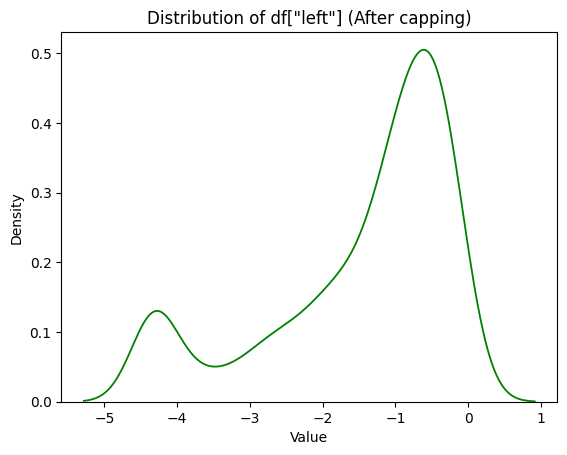

In [261]:
# capping using where() function
# cond - it'll keep only "cond" values remaining will be replaced by "other"

df_capped_iqr = df['left'].where(cond = df['left']>=ll, other=ll)
df_capped_iqr = df_capped_iqr.where(cond = df['left']<=ul, other=ul) 

# Plot a histogram of the generated data
# sns.kdeplot(df['right'], color='red')
sns.kdeplot(df_capped_iqr, color='green', linewidth=1.3)
plt.title('Distribution of df["left"] (After capping)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

<Figure size 640x480 with 0 Axes>

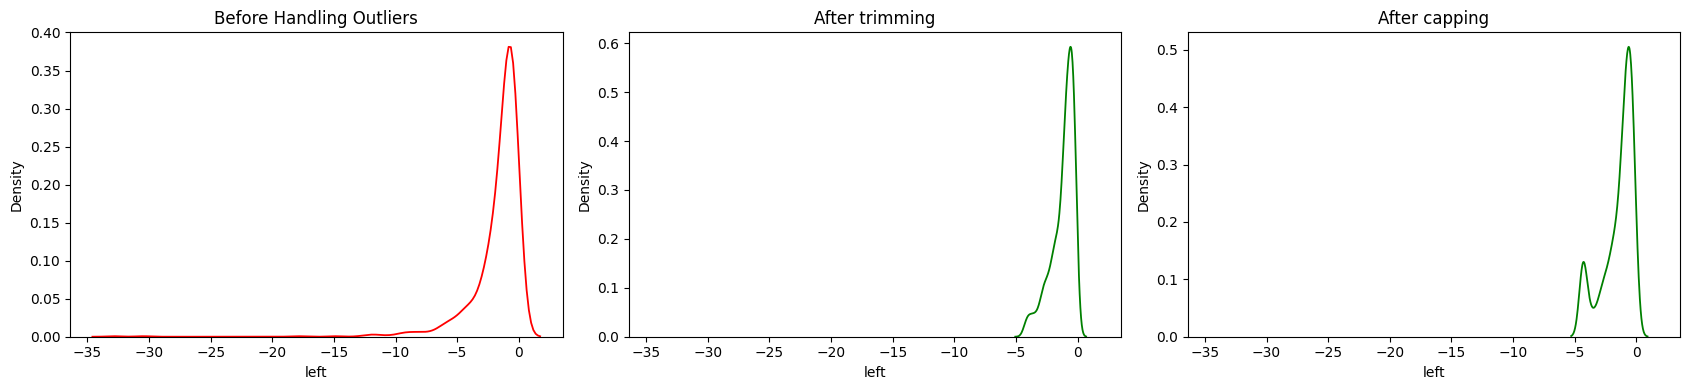

In [266]:
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (17, 4), sharex = True)

sns.kdeplot(df['left'], color='red', ax=ax[0], linewidth=1.3)
ax[0].set_title('Before Handling Outliers')
sns.kdeplot(trimmed_df_iqr['left'], color='green', ax=ax[1], linewidth=1.3)
ax[1].set_title('After trimming')
sns.kdeplot(df_capped_iqr, color='green', ax=ax[2], linewidth=1.3)
ax[2].set_title('After capping')
fig.tight_layout()     # adjust the margins and all
plt.show()

___

<h3 style="color: yellow;"><strong>Isolation Forest - Multivariate Outlier Detection Technique</strong></h3>

In [3]:
# load the data
df = pd.read_csv(pathlib.Path().resolve().parent.as_posix() + '/data/raw/sample1.csv')

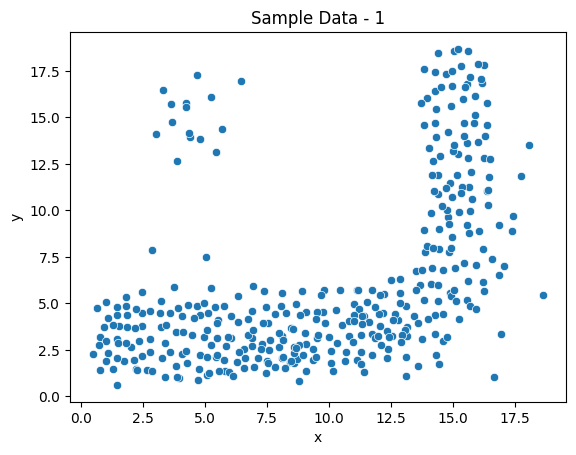

In [4]:
sns.scatterplot(x=df['x'], y=df['y'])
plt.title('Sample Data - 1')
plt.show()

In [5]:
print('X-Min: ', df['x'].min())
print('X-Max: ', df['x'].max())

print('Y-Min: ', df['y'].min())
print('Y-Max: ', df['y'].max())

X-Min:  0.47
X-Max:  18.642
Y-Min:  0.613
Y-Max:  18.682


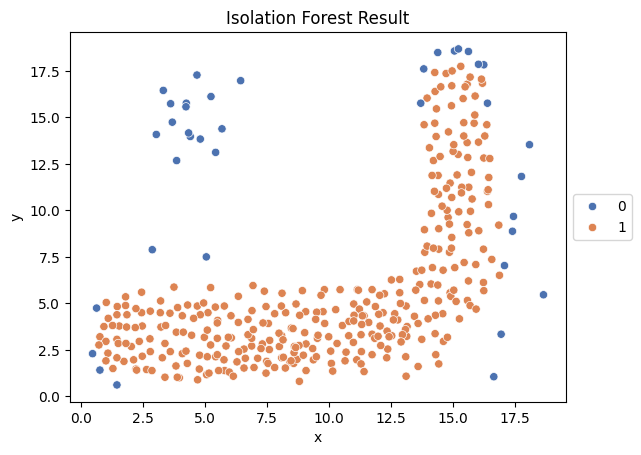

In [17]:
from sklearn.ensemble import IsolationForest

X = df.loc[:, ['x', 'y']]

clf = IsolationForest(random_state=42, contamination=0.1)  # here contamination score means % of outliers we want to extract from data like 0.1 means 10%, 0.05 - 5%, 0.5 - 50%
clf.fit(X)
y_pred = clf.predict(X)

df['is_outlier'] = y_pred

# here -1 means outliers and 1 means inlier
# replace -1 to 0
df['is_outlier'] = df['is_outlier'].where(df['is_outlier'] == 1, other=0)

# plot
obj = sns.scatterplot(data=df, x='x', y='y', hue='is_outlier', palette='deep')
obj.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('Isolation Forest Result')
plt.show()

In [16]:
df['is_outlier'].value_counts()[0] / len(df['is_outlier']) * 100

20.10723860589812

In [389]:
# get anomaly score
# x = clf.score_samples(X)
# x.sort()

# x[-1::-1]

<Font color = 'yellow'>
Lets try out on different dataset.

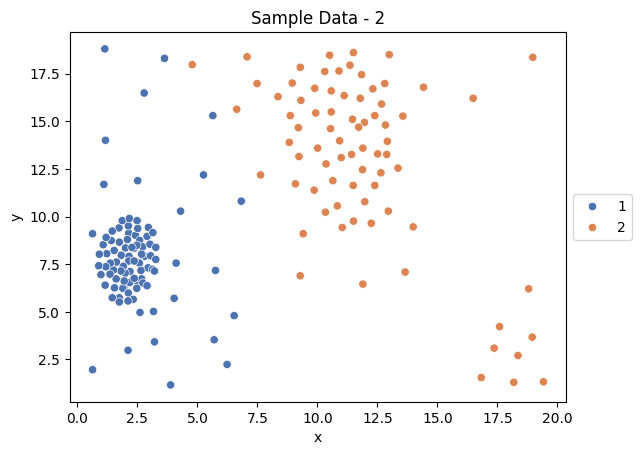

In [586]:
# load the data
df = pd.read_csv(pathlib.Path().resolve().parent.as_posix() + '/data/raw/sample2.csv')

# there are 2 clusters blur and orange, one is dense another is sparse, lets test isolation forest capability
obj = sns.scatterplot(x=df['x'], y=df['y'], hue=df['class'], palette='deep')
obj.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('Sample Data - 2')
plt.show()

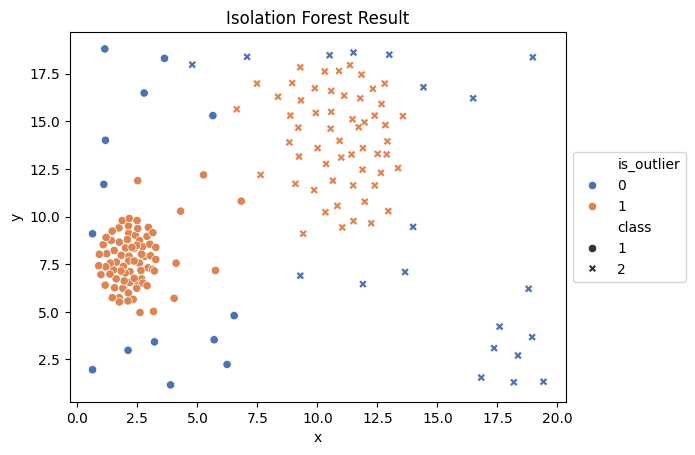

In [587]:
from sklearn.ensemble import IsolationForest

X = df.loc[:, ['x', 'y']]
clf = IsolationForest(random_state=42, contamination=0.2)
clf.fit(X)
y_pred = clf.predict(X)

df['is_outlier'] = y_pred

# here -1 means outliers and 1 means inlier
# replace -1 to 0
df['is_outlier'] = df['is_outlier'].where(df['is_outlier'] == 1, other=0)

# plot
obj = sns.scatterplot(data=df, x='x', y='y', hue='is_outlier', style='class', palette='deep')
obj.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('Isolation Forest Result')
plt.show()

<Font color = 'yellow'>

### The algo is giving preety good results but still it has some demerits:
- Computationally expensive
- no. of outliers still we need to tell (contamination score)

Mostly preferd when dealing with high dimensional data.

____

<h3 style="color: yellow;"><strong>KNN - Multivariate Outlier Detection Technique</strong></h3>

In [461]:
df.drop(columns='is_outlier', inplace=True)

KeyError: "['is_outlier'] not found in axis"

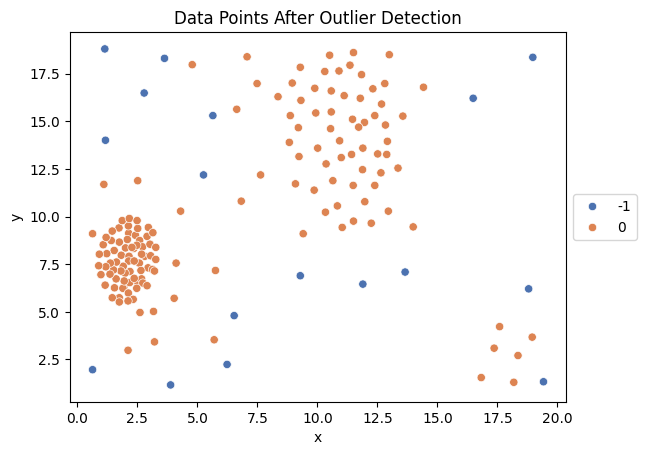

In [36]:
from sklearn.neighbors import NearestNeighbors

df = pd.read_csv(pathlib.Path().resolve().parent.as_posix() + '/data/raw/sample2.csv')
X = df.loc[:, ['x', 'y']]
# KNN include the point itself as its neighbor like when k=5 means 4 neighbor and 1 the datapoint itself therefore in indices first element is index of self, similar 
# in distance first distance will always be 0 because distance to itself will always 0. 
nbrs = NearestNeighbors(n_neighbors=8).fit(X)
distances, indices = nbrs.kneighbors(X)

# Calculate the outlier score (mean of distance)
outlier_scores = np.mean(distances, axis=1)
# outlier_scores = np.mean(distance[:, 1:], axis=1)

# Determine a threshold
# this threshold will help us to control the no. of outliers we want to extract from data 
threshold = np.percentile(outlier_scores, 90)  # using the 95th percentile as the threshold

# Identify outliers
outlier_indices = np.where(outlier_scores > threshold)[0]
outliers = X.iloc[outlier_indices]

X['is_outlier'] = 0
X.loc[outlier_indices, 'is_outlier'] = -1


# Plot the data after outlier detection
sns.scatterplot(x=X['x'], y=X['y'], palette='deep', hue=X['is_outlier'])
plt.title('Data Points After Outlier Detection')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

In [34]:
# indices[0]
distances[0]

array([0.        , 0.26521689, 0.26597932, 0.35103988, 0.52102303,
       0.53387733, 0.61491869, 0.63449192])

Our dataset has 2 clusters, one is dense and another is sparse. But when outlier itself create clusters then KNN fails here. Therefore LoF comes into picture.

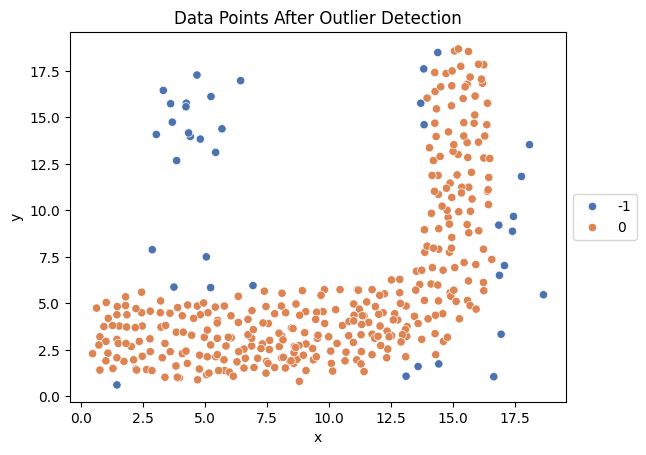

In [585]:
sample3 = pd.read_csv(pathlib.Path().resolve().parent.as_posix() + '/data/raw/sample1.csv')
X = sample3.iloc[:, [0,1]]

from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=15).fit(X)
distances, indices = nbrs.kneighbors(X)

# Calculate the outlier score
outlier_scores = np.mean(distances[:, 1:], axis=1)

# Determine a threshold
threshold = np.percentile(outlier_scores, 90)  # using the 75th percentile as the threshold

# Identify outliers
outlier_indices = np.where(outlier_scores > threshold)[0]

X['is_outlier'] = 0
X.loc[outlier_indices, 'is_outlier'] = -1

# Plot the data after outlier detection
sns.scatterplot(x=X['x'], y=X['y'], palette='deep', hue=X['is_outlier'])
plt.title('Data Points After Outlier Detection')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

<Font color = 'yellow'>

In single cluster dataset it will work good but we need to tune the value of n-neighbors and outlier threshold, which is very tricky part because in case of n-dim data we can not visualize the data

___

<Font color = 'yellow'>
<h3><strong>LoF - Multivariate Outlier Detection Technique</strong></h3>

LoF is density based algorithm while KNN is distance based. LoF internally compare the density of data point with the avg density of its neighborhood datapoints.

Let's p1 is datapoint and p2, p3, p4 are its neighbors.
- if d(p1) > avg d(p2,p3,p4), means either p2,p3,p4 belongs to other cluster or p1 belongs to center of cluster and p2,p3,p4 belongs to edge of clusters.
- if d(p2,p3,p4) > d(p1), means p1 is outlier.
- if d(p1) = d(p2,p3,p4), means all datapoints belongs to same cluster.

d(datapoints) - density of datapoints 

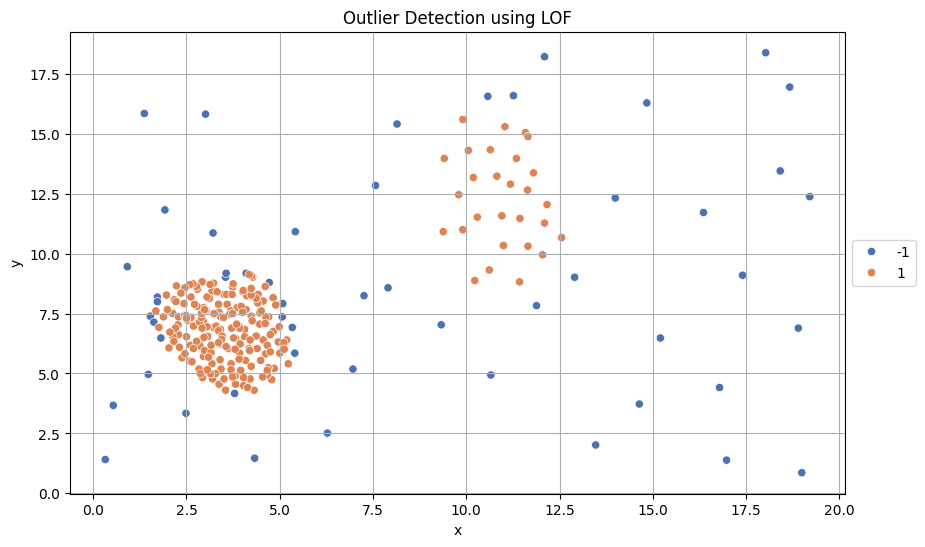

In [508]:
from sklearn.neighbors import LocalOutlierFactor

# loading data
sample3 = pd.read_csv(pathlib.Path().resolve().parent.as_posix() + '/data/raw/sample3.csv')
X = sample3.iloc[:, [0,1]]

# Applying LOF
clf_lof = LocalOutlierFactor(n_neighbors=13, contamination=0.2)   # 0.2 means 20%
y_pred_lof = clf_lof.fit_predict(X)
lof_scores = -clf_lof.negative_outlier_factor_  # Inverting the negative LOF scores for better interpretation

X['is_outlier'] = y_pred_lof

# Plotting the results
plt.figure(figsize=(10, 6))
sns.scatterplot(data = X, x='x', y='y', hue='is_outlier', palette='deep')
plt.title('Outlier Detection using LOF')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.grid(True)
plt.show()


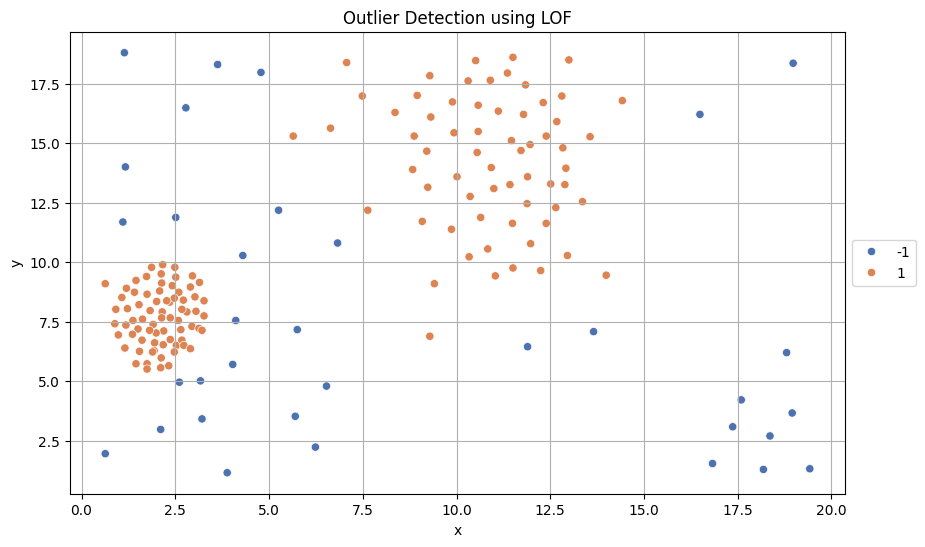

In [530]:
from sklearn.neighbors import LocalOutlierFactor

# loading data
sample3 = pd.read_csv(pathlib.Path().resolve().parent.as_posix() + '/data/raw/sample2.csv')
X = sample3.iloc[:, [0,1]]

# Applying LOF
clf_lof = LocalOutlierFactor(n_neighbors=13, contamination=0.2) # 0.2 means 20% datapoints
y_pred_lof = clf_lof.fit_predict(X)
lof_scores = -clf_lof.negative_outlier_factor_  # Inverting the negative LOF scores for better interpretation

X['is_outlier'] = y_pred_lof

# Plotting the results
plt.figure(figsize=(10, 6))
sns.scatterplot(data = X, x='x', y='y', hue='is_outlier', palette='deep')
plt.title('Outlier Detection using LOF')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.grid(True)
plt.show()


___

<Font Color= 'yellow'>

<h3><strong>DBSCAN - Multivariate Outlier Detection Technique</strong></h3>

Hyperparameters:
- eps: radius of circle (draw circle for neighborhood area)
- min_samples: No. of sample should be in neighborhood area to become core point

Limitations:
- Clusters with varying density is problematic

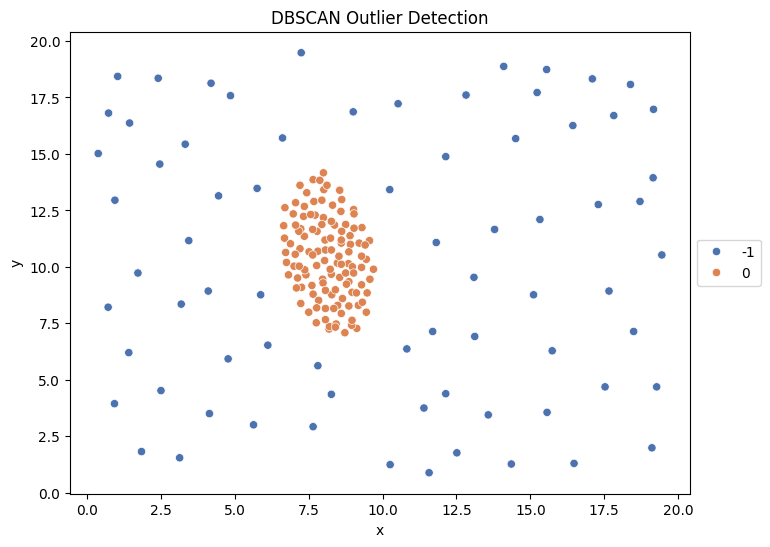

In [570]:
from sklearn.cluster import DBSCAN

df = pd.read_csv(pathlib.Path().resolve().parent.as_posix() + '/data/raw/sample4.csv')
X = df.iloc[:, [0,1]]

# Fit DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=3)
labels = dbscan.fit_predict(X)

new_label = np.where(labels != -1, 0, -1)
X['outliers'] = new_label

# Plotting the results
plt.figure(figsize=(8, 6))
sns.scatterplot(data=X, x='x', y='y', hue='outliers', palette='deep')
plt.title('DBSCAN Outlier Detection')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()
